# Quantum Teleportation Lab
Deadline: 07/10, 11:59 PM!

In [ ]:
# !pip install qiskit
# !pip install pylatexenc
# !pip install qiskit_aer

About libraries: If your QisKit version and matplotlib are not compatible, try to come up with another way to visualize the bloch spheres.

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, Operator
import numpy as np
import matplotlib.pyplot as plt

##### You are allowed to use other libraries for the bloch sphere visualization, instead of qiskit.visualization.
from qiskit.visualization import plot_bloch_vector ## Don't need this one? comment it out!
###### Do you need more libraries for visualization? Import them! :)

# Step 1: Set up the circuit
We start by initializing a 3-qubit quantum circuit.

Qubit 0 will be used for the quantum state to teleport (Alice’s qubit).

Qubit 1 will be Alice’s half of the entangled pair.

Qubit 2 will be Bob’s qubit (receiver).

In [ ]:
# Step 1: Initialize a quantum circuit with 3 qubits (no classical bits needed for statevector simulation)
qc = QuantumCircuit(_)


# Step 2: Prepare the input state to teleport
You’ll encode a quantum state in qubit 0 based on two classical bits.

'00': no gate → qubit is in state ∣0⟩

'01': apply X gate → ∣1⟩

'10': apply H gate → ∣+⟩

'11': apply X then H → ∣−⟩

This step simulates how **2 classical bits** could be used to prepare different states — similar to superdense coding.

In [ ]:

# Step 2: Prepare the state to teleport (qubit 0) — simulate classical input (like in superdense coding)

input_bits = _  # Change this to '00', '01', '10', or '11' to test other cases

if input_bits == _:
    pass  # |0>
elif input_bits == _:
    qc.x(_)  # |1>
elif input_bits == _:
    qc.h(_)  # |+>
elif input_bits == _:
    qc.x(_)
    qc.h(_)  # |->


# Step 3: Create entanglement between Alice and Bob
Qubit 1 (Alice) and qubit 2 (Bob) are entangled:

Apply H gate to qubit 1.

Apply CX with qubit 1 as control and qubit 2 as target.

This creates a Bell state (entangled pair), essential for teleportation.

In [ ]:

# Step 3: Create entanglement between qubit 1 and 2 (shared EPR pair between Alice and Bob)
qc.h(_)
qc.cx(_, _)


# Step 4: Bell-state measurement
Alice performs a Bell measurement on:

Qubit 0 (her input state).

Qubit 1 (her entangled qubit).

This involves:

CX(0, 1) — entangles the input with her part of the EPR pair.

H(0) — transforms into Bell basis.

At this point, Alice has encoded information about the input state into the entangled pair.



In [ ]:

# Step 4: Bell-state measurement on Alice's qubits (0 and 1)
qc.cx(_, _)
qc.h(_)


# Step 5: Measure Alice’s qubits
Alice measures qubits 0 and 1 (her two qubits).

This collapses the state and gives two classical bits.

These bits are supposed to tell Bob which gate(s) to apply to his qubit to reconstruct the original state.

But since we don't use c_if, we do this classically (next steps).

You are wondering what c_if is? **Look it up and answer here:**

Why do you think we didn't use c_if here? **Your answer here:**

In [ ]:

# Step 5: Simulate the circuit up to this point (before measurement and classical corrections)
# We will manually apply corrections to the statevector based on the expected measurement outcomes

# Simulate to get statevector before measurement
initial_state_before_measurement = Statevector.from_instruction(qc)

# Display the statevector before measurement (optional)
print("Statevector before measurement and correction:")
print(initial_state_before_measurement)


# Step 6: Simulate state and apply corrections manually
Instead of applying gates based on c_if, we simulate what happens under each possible measurement outcome:

'00' → no correction

'01' → apply X to qubit 2

'10' → apply Z to qubit 2

'11' → apply X then Z to qubit 2

Each branch is handled by projecting the statevector and applying gates classically.

This simulates the corrections Bob would do based on Alice’s result.

Statevector before measurement and correction:
Statevector([ 0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
             -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))


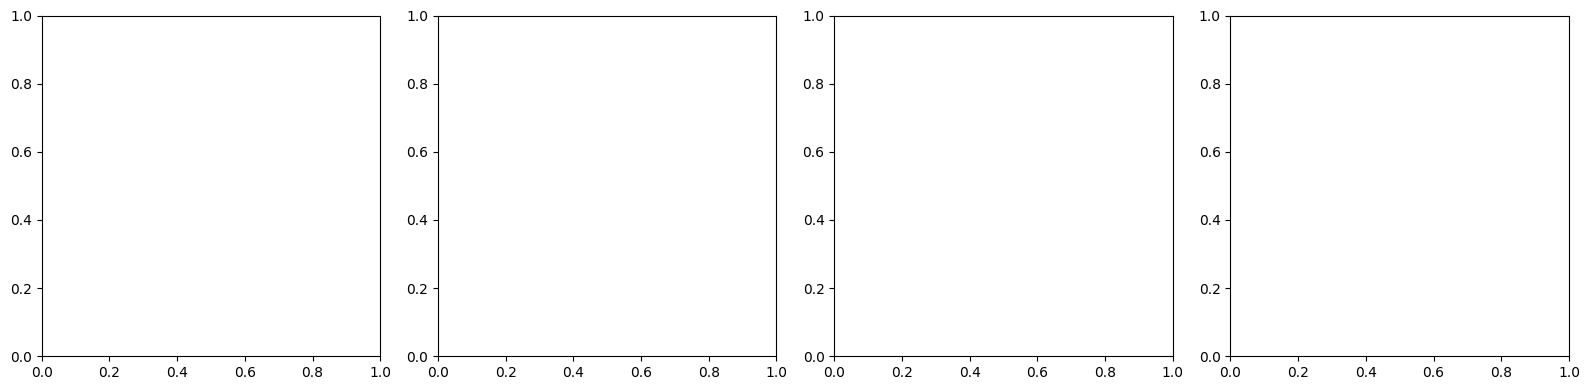

In [ ]:

# Step 6: Manually apply corrections to qubit 2 depending on the *expected* measurement result
# We'll project the statevector onto each possible measurement outcome and apply the corresponding correction

def apply_correction(meas_result, statevec):
    qc_corr = QuantumCircuit(3)
    if meas_result == _:
        pass
    elif meas_result == _:
        qc_corr.x(_)
    elif meas_result == _:
        qc_corr.z(_)
    elif meas_result == _:
        qc_corr.x(_)
        qc_corr.z(_)
    return statevec.evolve(qc_corr)

# Possible measurement outcomes for qubits 0 and 1
possible_measurements = [_, _, _, _]
corrected_states = {}


# What you're doing next:
You are now going one level deeper than using Qiskit’s built-in .project() function. You're manually projecting the statevector onto each possible measurement outcome from Alice’s qubits (qubit 0 and 1), then normalizing, correcting, and finally visualizing Bob's qubit.

# Step 7:
**Loop over all possible measurement results from Alice:**

The possible 2-bit outcomes for qubits 0 and 1 are '00', '01', '10', and '11'.

**Manually project the statevector:**

You manually isolate only the parts of the full quantum state that match the measurement outcome.

Qiskit uses little-endian ordering, meaning qubit 0 is the rightmost bit when interpreting binary indices.

To match the measurement outcome to the proper indices in the statevector, you reverse the string using meas[::-1].

**Build a new statevector with just the components that match the outcome:**

You zero out all amplitudes that don't match the measurement.

This is like filtering the quantum state to keep only the paths that are consistent with Alice’s result.

**Normalize the projected state:**

A valid quantum state must be normalized (total probability = 1).

You compute the norm, and skip cases where it’s too close to zero (numerical noise or improbable branches).

**Apply Bob's correction manually:**

For each valid projected state, apply the proper correction gates (X, Z, or both) to Bob’s qubit (qubit 2).

This simulates what Bob would do once he learns Alice’s measurement result

question: What limitations do you think qiskit has that made us to manually project the statevector? **Your answer here: **

In [ ]:
for meas in possible_measurements:
    # Manually project statevector onto each measurement outcome (qubits 0 and 1)
    # Keep the components of the statevector where qubits 0 and 1 match the measurement outcome
    proj_state_data = np.zeros_like(initial_state_before_measurement.data)
    # Qiskit uses little-endian ordering for qubits in the statevector, so the binary
    # representation of the index i is ordered as q(n-1) ... q2 q1 q0.
    # We are projecting on qubits 0 and 1, which are the last two bits in this ordering.
    # The measurement outcome 'meas' is given as 'q0q1'.
    # So, if meas = '01', we are looking for indices where the last two bits (q1 q0) are '10' (binary representation of 2).
    meas_value_bin_qiskit_order = meas[_] # Reverse 'q0q1' to 'q1q0' to match the order in the binary representation of the index

    for i in range(2**_):
        binary_repr = bin(_)[2:].zfill(_)
        # Extract bits for qubits 0 and 1 (q1 q0) from the binary representation of the index
        qubit_0_1_bits_from_index = binary_repr[_]

        if qubit_0_1_bits_from_index == meas_value_bin_qiskit_order:
            proj_state_data[_] = initial_state_before_measurement.data[_]

    # Create a new Statevector from the projected data
    proj_state = Statevector(_)

    # Normalize the projected state (if it's not the zero vector)
    norm = np.linalg.norm(_.data)
    if norm > _: # Use a small tolerance to avoid division by zero
        normalized_proj_state = _ / _
        corrected = apply_correction(_, _)
        corrected_states[_] = corrected
    else:
        # Handle cases where the projection results in a zero vector (this outcome is not possible)
        print(f"Projection for measurement {meas} resulted in a zero vector. Skipping.")


# Step 8: Bloch Vector Visualization of Bob’s Qubit
**Define Pauli operators:**

You define
𝑋, 𝑌, and 𝑍 operators as matrices.

These are used to extract Bloch vector components.

**Trace out Alice’s qubits:**

You use partial_trace to remove qubits 0 and 1, leaving only Bob’s qubit state.

**Calculate the Bloch vector:**

For each corrected state, calculate the expectation values of 𝑋, 𝑌, and 𝑍.

These values determine the Bloch vector of the final state — a 3D vector showing its position on the Bloch sphere.

**Plot the Bloch vectors:**

You generate one Bloch sphere plot for each measurement result.

If teleportation is successful, the vectors should point in the same direction as the original state you prepared in Step 2.

In [ ]:
# Define Pauli operators as Operators
X_op = Operator(_)
Y_op = Operator(_)
Z_op = Operator(_)

# Plot Bloch vectors of corrected qubit (Bob’s qubit 2) for each case
fig, axs = plt.subplots(1, len(corrected_states), figsize=(4 * len(corrected_states), 4))
for i, (_, _) in enumerate(corrected_states.items()):
    # Trace out Alice's qubits (0 and 1) to get the reduced density matrix for qubit 2
    rho = partial_trace(_, [0,1])
    # Calculate Bloch vector components from the reduced density matrix using expectation_value
    bloch = [np.real(rho.expectation_value(_)),
             np.real(rho.expectation_value(_)),
             np.real(rho.expectation_value(_))]
    # plot_bloch_vector(bloch, title=f"After correction\n(meas={meas})", ax=axs[i])

    #### YOUR Code HERE!
    #### Visualize the Bloch Vectors

plt.tight_layout()
plt.show()

# Step 9: Explore Interference Using Hadamard on Bob’s Qubit

After Bob has applied his correction and you’ve isolated his qubit (qubit 2), apply a Hadamard gate to that qubit.

Then measure the result to see how likely it is to be |0⟩ or |1⟩.

This tests how quantum interference behaves for the different input states you teleported (like |+⟩ or |-⟩).




In [ ]:
from qiskit import ClassicalRegister

print("\n=== Interference Analysis via Hadamard on Bob's Qubit ===")
for meas, state in corrected_states.items():
    # Create a new circuit to apply H and measure qubit 2
    qc_intf = QuantumCircuit(_, _)
    qc_intf.set_statevector(_)
    qc_intf.h(_)
    qc_intf.measure(_, _)

    # Simulate measurement
    backend = AerSimulator()
    t_qc_intf = transpile(_, _)
    result = backend.run(_, shots=1000).result()
    counts = result.get_counts()

    print(f"Measurement = {_} → Interference result on Bob's qubit after H: {_}")
